In [79]:
## Import the  pyspark libraries adn create the pyspark session
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Rainfall-predictions-ML-project').getOrCreate()
spark


In [80]:
## Read the train set
df_train_set=spark.read.csv('train.csv',header=True,inferSchema=True)
df_train_set.show()

+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  0|  1|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|
|  1|  2|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|
|  2|  3|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|
|  3|  4|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|
|  4|  5|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|
|  5|  6|  1022.7|   20.6|       18.6|   16.5|    12.5|    79.0| 81.0|     0.0|         20.0|   

In [81]:
## check the data types of each column in dataset
df_train_set.printSchema()

root
 |-- id: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- pressure: double (nullable = true)
 |-- maxtemp: double (nullable = true)
 |-- temparature: double (nullable = true)
 |-- mintemp: double (nullable = true)
 |-- dewpoint: double (nullable = true)
 |-- humidity: double (nullable = true)
 |-- cloud: double (nullable = true)
 |-- sunshine: double (nullable = true)
 |-- winddirection: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- rainfall: integer (nullable = true)



In [82]:
## check the column names
df_train_set.columns

['id',
 'day',
 'pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed',
 'rainfall']

## Data Preprocessing

In [83]:
## chech the null values
from pyspark.sql.functions import col,isnan, when, count
df_train_set.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_train_set.columns]
   ).show()


+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
| id|day|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  0|  0|       0|      0|          0|      0|       0|       0|    0|       0|            0|        0|       0|
+---+---+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+



In [84]:
df_train_set=df_train_set.select(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed','rainfall'])
df_train_set.show()

+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|
+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+
|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|
|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|
|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|
|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|
|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|
|  1022.7|   20.6|       18.6|   16.5|    12.5|    79.0| 81.0|     0.0|         20.0|     15.7|       1|
|  1022.8|   19.5|       18.4|   15.3|    11.3|    56.0

In [85]:
## seperate the independent features and target lables
#independent_features=df_train_set.select(['id','day','pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])
#target_feature=df_train_set.select(['rainfall'])
#independent_features.show(),target_feature.show()

In [86]:
from pyspark.ml.feature import VectorAssembler
feature_assembler = VectorAssembler(inputCols=['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'],outputCol='independent_features')
output_features =feature_assembler.transform(df_train_set)
output_features.show()

+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+--------------------+
|pressure|maxtemp|temparature|mintemp|dewpoint|humidity|cloud|sunshine|winddirection|windspeed|rainfall|independent_features|
+--------+-------+-----------+-------+--------+--------+-----+--------+-------------+---------+--------+--------------------+
|  1017.4|   21.2|       20.6|   19.9|    19.4|    87.0| 88.0|     1.1|         60.0|     17.2|       1|[1017.4,21.2,20.6...|
|  1019.5|   16.2|       16.9|   15.8|    15.4|    95.0| 91.0|     0.0|         50.0|     21.9|       1|[1019.5,16.2,16.9...|
|  1024.1|   19.4|       16.1|   14.6|     9.3|    75.0| 47.0|     8.3|         70.0|     18.1|       1|[1024.1,19.4,16.1...|
|  1013.4|   18.1|       17.8|   16.9|    16.8|    95.0| 95.0|     0.0|         60.0|     35.6|       1|[1013.4,18.1,17.8...|
|  1021.8|   21.3|       18.4|   15.2|     9.6|    52.0| 45.0|     3.6|         40.0|     24.8|       0|[1021.8,21.3,1

In [87]:
## select the  indepedent features from dataset
output_independent_features=output_features.select('independent_features')
output_independent_features.show()

+--------------------+
|independent_features|
+--------------------+
|[1017.4,21.2,20.6...|
|[1019.5,16.2,16.9...|
|[1024.1,19.4,16.1...|
|[1013.4,18.1,17.8...|
|[1021.8,21.3,18.4...|
|[1022.7,20.6,18.6...|
|[1022.8,19.5,18.4...|
|[1019.7,15.8,13.6...|
|[1017.4,17.6,16.5...|
|[1025.4,16.5,14.4...|
|[1016.8,16.3,15.3...|
|[1012.5,16.2,15.2...|
|[1020.4,15.0,15.5...|
|[1012.5,13.5,12.9...|
|[1018.4,17.8,16.5...|
|[1024.3,15.3,12.9...|
|[1022.5,16.3,13.1...|
|[1034.6,17.5,16.2...|
|[1024.1,16.8,15.8...|
|[1020.2,16.4,14.2...|
+--------------------+
only showing top 20 rows



In [88]:
## scale the dataset usinf standard scaling
#from pyspark.ml.feature import StandardScaler
#scaler=StandardScaler(inputCol='independent_features', outputCol='scaled_features',withStd=True, withMean=False)
#scaler_model=scaler.fit(output_independent_features)
#scaled_train_data = scaler_model.transform(output_independent_features)
#scaled_train_data.show()

In [89]:
#scaled_train_preprocessed_data=scaled_train_data.select('scaled_features')
#scaled_train_preprocessed_data.show()

## Explotary Data Analysis

In [90]:
#scaled_train_preprocessed_data.show()

In [91]:
## convert to pandas dataframe
#pandas_df=scaled_train_preprocessed_data.toPandas()
#pandas_df.head()



In [92]:
#pandas_df.shape

In [93]:
df_train_set_pandas = df_train_set.toPandas()
df_train_set_pandas.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [94]:
df_train_set_pandas_new=df_train_set_pandas.drop('rainfall',axis=True)
df_train_set_pandas_new.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8


In [102]:
df_train_set_pandas_target_column=df_train_set_pandas['rainfall']
df_train_set_pandas_target_column

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int32

In [96]:
df_train_set_pandas.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall'],
      dtype='object')

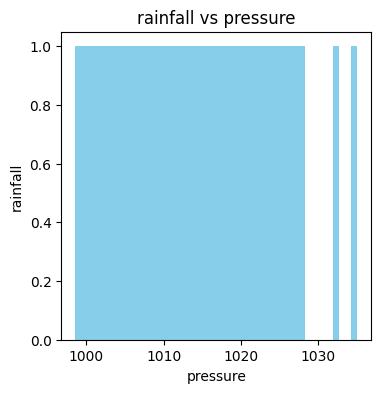

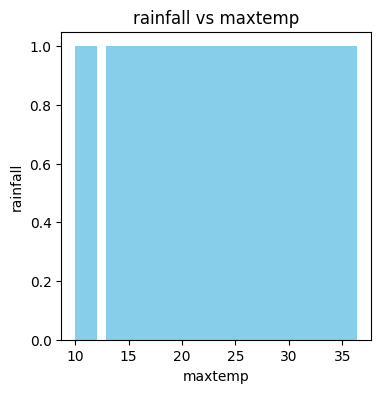

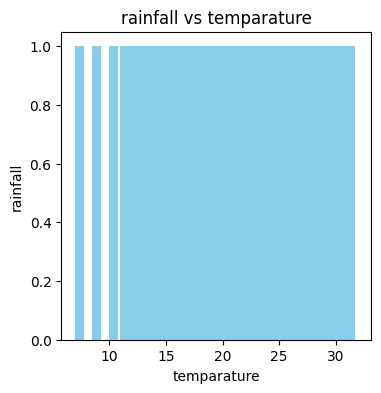

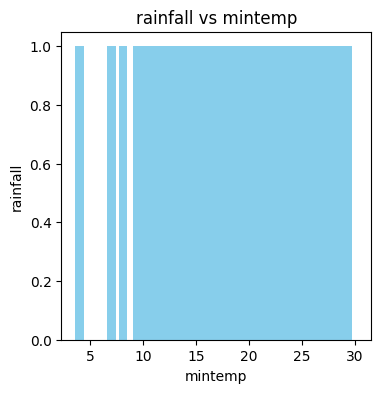

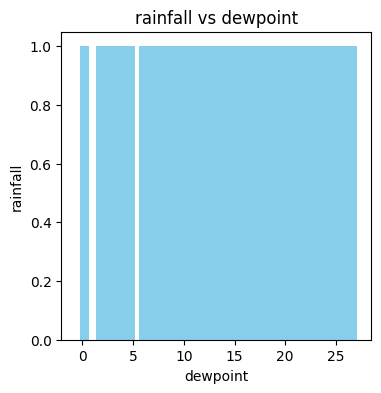

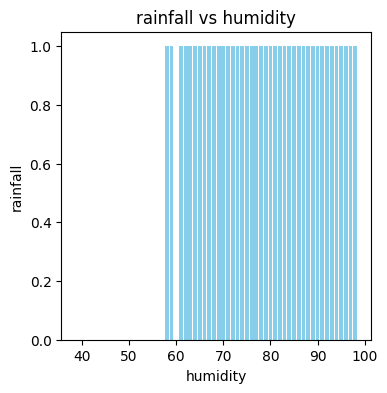

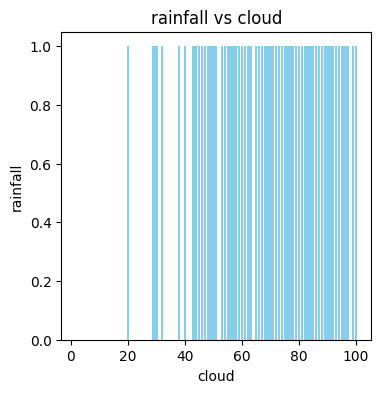

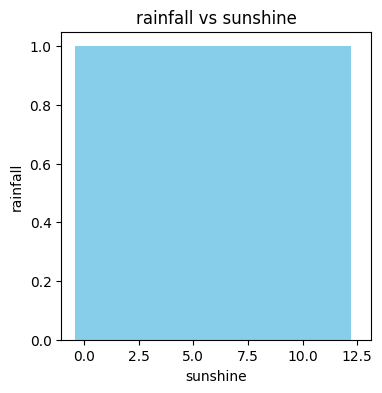

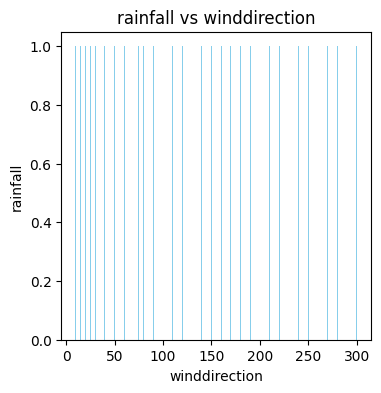

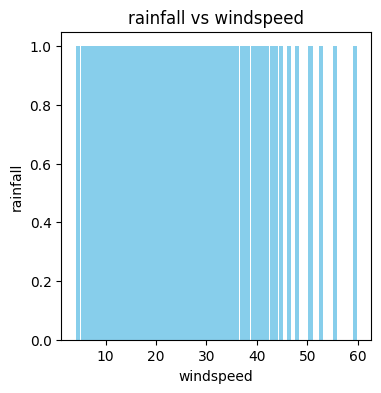

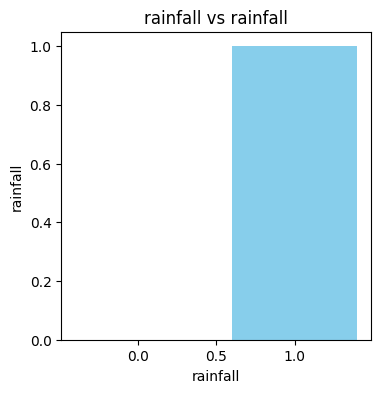

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
for df_train_set_pandas_columns in df_train_set_pandas.columns:
    #print(type(df_train_set_pandas_columns))
    plt.figure(figsize=(4, 4))
    plt.bar(df_train_set_pandas[df_train_set_pandas_columns], df_train_set_pandas["rainfall"],color="skyblue")
    plt.xlabel(df_train_set_pandas_columns)
    plt.ylabel("rainfall")
    plt.title("rainfall vs "+df_train_set_pandas_columns)
    plt.show()

In [98]:
## check the information of dataset
pandas_df_info=df_train_set_pandas.info()
pandas_df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       2190 non-null   float64
 1   maxtemp        2190 non-null   float64
 2   temparature    2190 non-null   float64
 3   mintemp        2190 non-null   float64
 4   dewpoint       2190 non-null   float64
 5   humidity       2190 non-null   float64
 6   cloud          2190 non-null   float64
 7   sunshine       2190 non-null   float64
 8   winddirection  2190 non-null   float64
 9   windspeed      2190 non-null   float64
 10  rainfall       2190 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 179.8 KB


In [99]:
## check the summary stactics of dataset
pandas_df_stat=df_train_set_pandas.describe()
pandas_df_stat

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [100]:
correlation=df_train_set_pandas.corr()
print(correlation)

               pressure   maxtemp  temparature   mintemp  dewpoint  humidity  \
pressure       1.000000 -0.800499    -0.816531 -0.814453 -0.817008 -0.119949   
maxtemp       -0.800499  1.000000     0.982932  0.965529  0.906703 -0.072615   
temparature   -0.816531  0.982932     1.000000  0.987150  0.933617 -0.025016   
mintemp       -0.814453  0.965529     0.987150  1.000000  0.941342  0.009891   
dewpoint      -0.817008  0.906703     0.933617  0.941342  1.000000  0.153390   
humidity      -0.119949 -0.072615    -0.025016  0.009891  0.153390  1.000000   
cloud          0.098600 -0.289047    -0.249355 -0.219399 -0.088446  0.584854   
sunshine      -0.257163  0.452387     0.414019  0.379497  0.249676 -0.541592   
winddirection -0.643293  0.662235     0.668963  0.663828  0.643073 -0.012430   
windspeed      0.266012 -0.354168    -0.342262 -0.328871 -0.312179  0.062285   
rainfall      -0.049886 -0.079304    -0.049660 -0.026841  0.081965  0.454213   

                  cloud  sunshine  wind

## Model selection and Model training

In [103]:
## Split the trainset into train and test set (validation set)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df_train_set_pandas_new,df_train_set_pandas_target_column, test_size=0.2, random_state=42)

In [105]:
#X_train.head()